In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path to EPI folders
path = r"C:\Users\alabaro\OneDrive - DAI\Documents\EPI Analysis"

In [4]:
# import data file
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'epi-gdp-cap.csv'))

In [5]:
df.head()

,code,iso,country,region,paris,gdppercap,gdp,EPI.new,HLT.new,AIR.new,...,CCH.rnk.old,CDA.rnk.old,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old
0,4,AFG,Afghanistan,Southern Asia,1.0,363.674087,1.458314e+10,43.6,16.0,15.5,...,159,161,164,NaN,141,142,112,12.0,129,1
1,8,ALB,Albania,Eastern Europe,1.0,6802.804519,1.888210e+10,47.1,40.0,37.5,...,108,156,26,77.0,70,173,39,37.0,25,67
2,12,DZA,Algeria,Greater Middle East,1.0,4273.922183,1.919130e+11,29.6,42.0,39.4,...,120,74,48,15.0,115,156,151,99.0,87,105
3,24,AGO,Angola,Sub-Saharan Africa,1.0,2998.501158,1.067140e+11,30.5,20.5,23.1,...,81,29,35,77.0,132,105,119,135.0,1,87
4,28,ATG,Antigua and Barbuda,Latin America & Caribbean,1.0,18745.173510,1.757604e+09,52.4,55.8,56.5,...,33,133,53,70.0,119,67,14,109.0,133,112


In [7]:
# create subset with just EPI indicators

df_gdp = df[['gdppercap', 'gdp',
                    'EPI.new',
                    'GHN.new',
                    'GHP.new',
                      ]]

In [8]:
# Check for missing values

df_gdp.isnull().sum()

gdppercap    1
gdp          1
EPI.new      0
GHN.new      0
GHP.new      0
dtype: int64

In [9]:
# Check again for missing values

df_gdp.isnull().sum()

gdppercap    1
gdp          1
EPI.new      0
GHN.new      0
GHP.new      0
dtype: int64

In [10]:
# Impute missing values with median

df_gdp['gdp'].fillna(df_gdp['gdp'].median(), inplace=True)
df_gdp['gdppercap'].fillna(df_gdp['gdppercap'].median(), inplace=True)

C:\Users\alabaro\AppData\Local\Temp\ipykernel_1212\179689402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['gdp'].fillna(df_gdp['gdp'].median(), inplace=True)
C:\Users\alabaro\AppData\Local\Temp\ipykernel_1212\179689402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['gdppercap'].fillna(df_gdp['gdppercap'].median(), inplace=True)


In [11]:
# Check for missing values

df_gdp.isnull().sum()

gdppercap    0
gdp          0
EPI.new      0
GHN.new      0
GHP.new      0
dtype: int64

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_gdp).score(df_gdp) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[-1.0184165202698835e+27,
 -1.1270674709630963e+26,
 -4.77882404428229e+25,
 -1.966699031782291e+25,
 -8.755076477566411e+24,
 -4.200863500739723e+24,
 -2.8215639666563897e+24,
 -1.595650275273289e+24,
 -1.1392814875881377e+24]

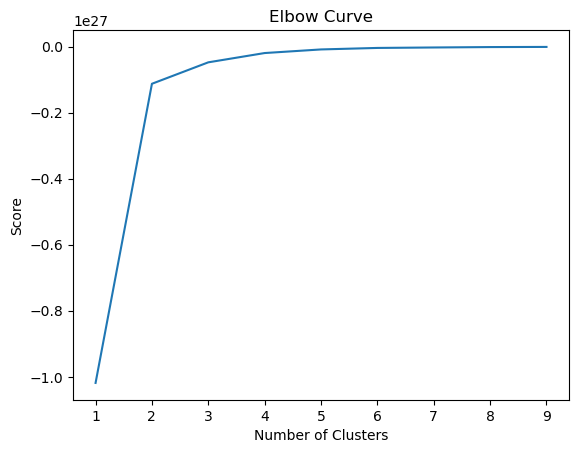

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_gdp)

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
# Create column in df that contains the assigned cluster for each row

df_gdp['clusters'] = kmeans.fit_predict(df_gdp)

C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alabaro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alabaro\AppData\Local\Temp\ipykernel_1212\2898154765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['clusters'] = kmeans.fit_predict(df_gdp)


In [19]:
# check output

df_gdp.head(2)

,gdppercap,gdp,EPI.new,GHN.new,GHP.new,clusters
0,363.674087,1.458314e+10,43.6,45.3,100.0,0
1,6802.804519,1.888210e+10,47.1,53.9,61.5,0


In [20]:
# check output for the clusters column

df_gdp['clusters'].value_counts()

clusters
0    164
2     14
1      2
Name: count, dtype: int64

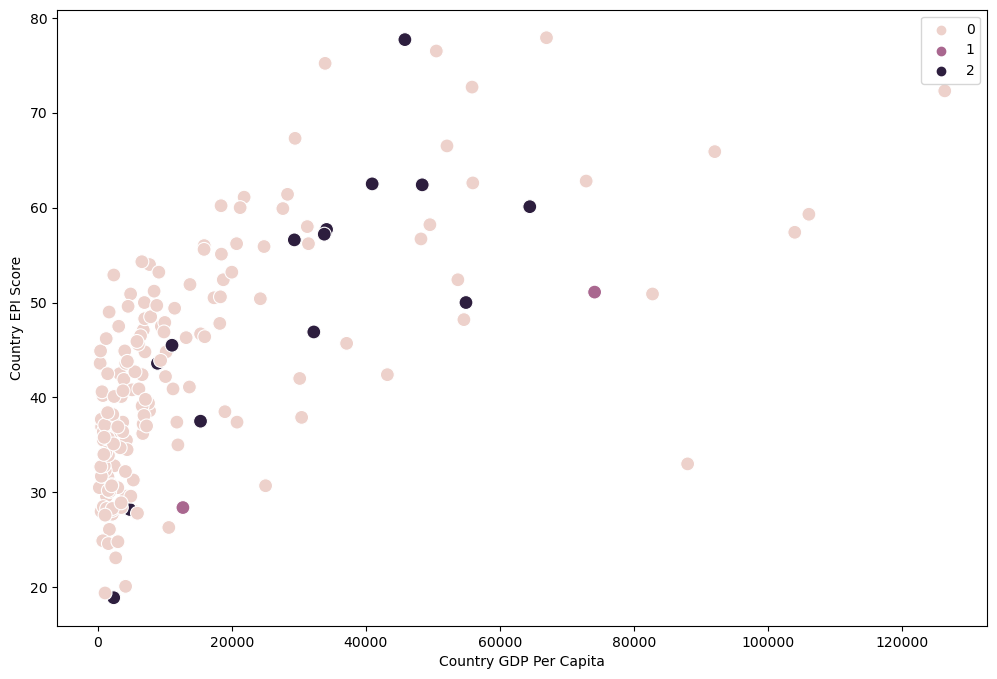

In [21]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gdppercap'], y=df['EPI.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country GDP Per Capita')
plt.ylabel('Country EPI Score')
plt.show()

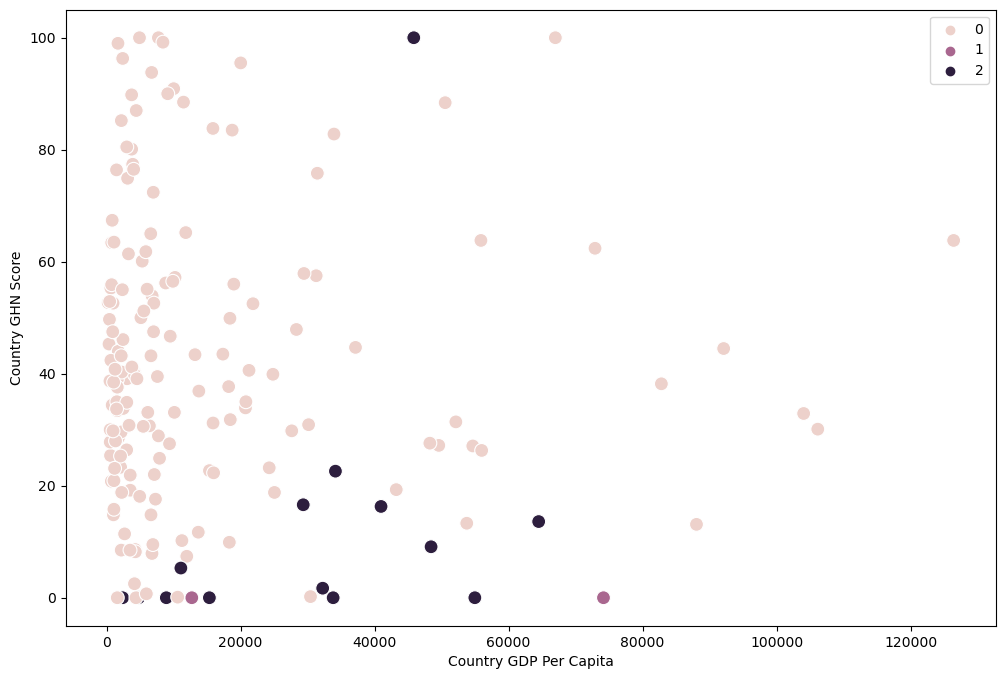

In [22]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gdppercap'], y=df['GHN.new'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Country GDP Per Capita')
plt.ylabel('Country GHN Score')
plt.show()

In [23]:
# export df

df_gdp.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cluster_gdp.csv'))